In [28]:
#Assignment 3

In [27]:
#Question:

'''

Use the Airline Passenger Satisfaction dataset to perform factor analysis. 
(Use only the columns that represent the ratings given by the passengers, only 14 columns). 
Choose the best features possible that helps in dimensionality reduction, without much loss in information.

'''

'\n\nUse the Airline Passenger Satisfaction dataset to perform factor analysis. \n(Use only the columns that represent the ratings given by the passengers, only 14 columns). \nChoose the best features possible that helps in dimensionality reduction, without much loss in information.\n\n'

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

In [ ]:
#Exploratory Data Analysis

In [10]:
df = pd.read_csv("train.csv")

In [11]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [12]:
# We have 25 columns. The first two columns don't seem to contain any important information for our purpose. 
# We can therefore remove them.

df.drop(['Unnamed: 0', 'id', ], axis=1, inplace=True)

In [13]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [14]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

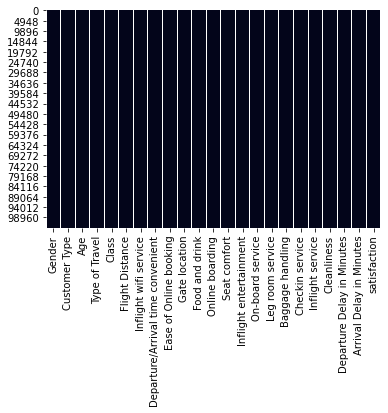

In [15]:
sns.heatmap(df.isnull(), cbar=False)
df.isnull().sum()

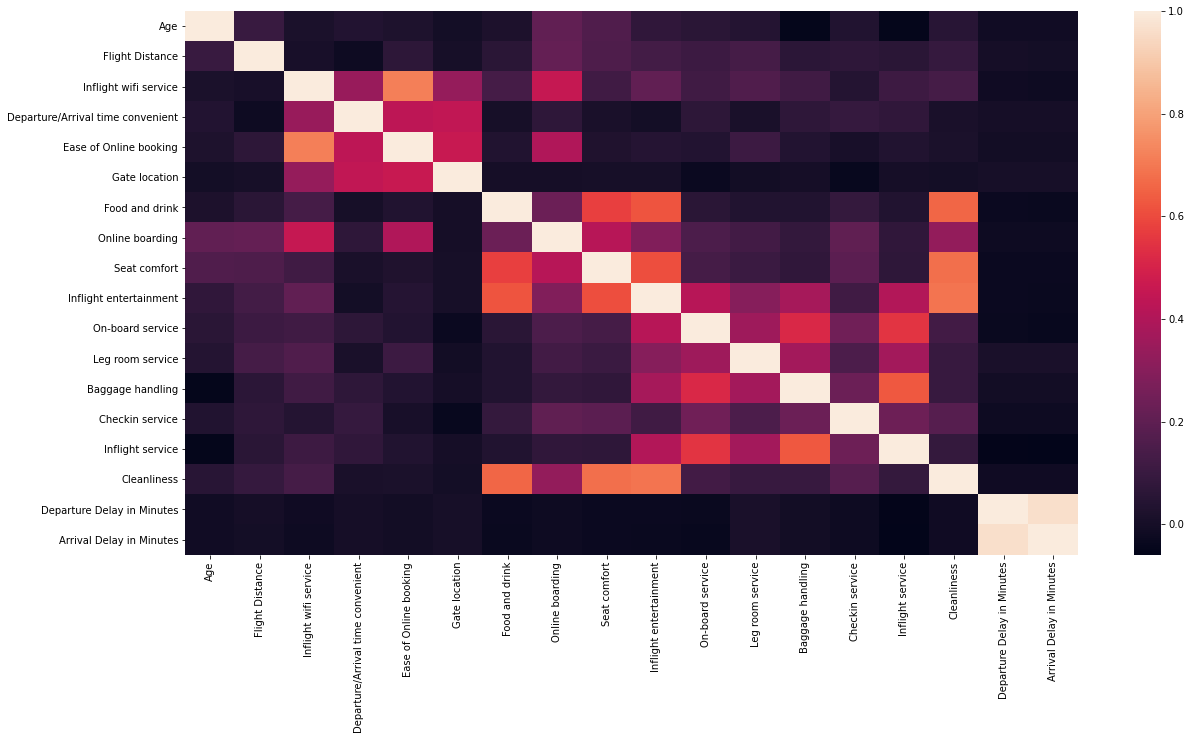

In [16]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c)

In [17]:
df.drop(['Arrival Delay in Minutes'], axis=1, inplace=True)

In [18]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, satisfaction]
Index: []

[0 rows x 22 columns]


In [19]:
df['satisfaction'].describe()

count                      103904
unique                          2
top       neutral or dissatisfied
freq                        58879
Name: satisfaction, dtype: object

In [20]:
df.satisfaction.replace(['satisfied', 'neutral or dissatisfied'], [1,0], inplace=True)

In [21]:
eco = df[df['Class']=='Eco'][df.columns[6:20]].mean().mean()
eco_plus = df[df['Class']=='Eco Plus'][df.columns[6:20]].mean().mean()
business = df[df['Class']=='Business'][df.columns[6:20]].mean().mean()
print(eco, eco_plus, business)

3.0670277951805396 3.0686835182431653 3.4301678388057124


In [22]:
df.groupby('Class')[df.columns[6:20]].mean()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Class,,,,,,,,,,,,,,
Business,2.775315,2.905910,2.913964,2.982926,3.323165,3.716541,3.760858,3.635437,3.679472,3.644498,3.842907,3.519178,3.844579,3.477600
Eco,2.675067,3.199123,2.605241,2.971954,3.086277,2.812985,3.138838,3.098256,3.120355,3.085720,3.450551,3.122002,3.463921,3.108097
Eco Plus,2.767948,3.217507,2.661996,2.967574,3.122631,2.889245,3.183747,3.141713,3.047638,3.061382,3.363758,3.017214,3.388444,3.130771


Text(0.5, 1.0, 'Neutral or dissatisfied per class')

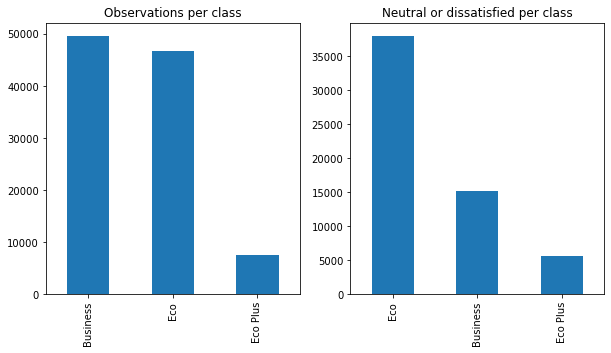

In [23]:
plt.subplot(1,2,1)
df.Class.value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Observations per class')
plt.subplot(1,2,2)
df[df['satisfaction']==0].Class.value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Neutral or dissatisfied per class')

In [24]:
eco_proportion = len(df[df['Class']=='Eco'])/len(df)
bad_proportion = len(df[df['Class']=='Eco']['satisfaction']==0)/len(df[df['satisfaction']==0])
print(eco_proportion, bad_proportion)

0.449886433631044 0.7939163368943086


In [25]:
df[df['Class']=='Eco'][df.columns[6:20]].mean()

Inflight wifi service                2.675067
Departure/Arrival time convenient    3.199123
Ease of Online booking               2.605241
Gate location                        2.971954
Food and drink                       3.086277
Online boarding                      2.812985
Seat comfort                         3.138838
Inflight entertainment               3.098256
On-board service                     3.120355
Leg room service                     3.085720
Baggage handling                     3.450551
Checkin service                      3.122002
Inflight service                     3.463921
Cleanliness                          3.108097
dtype: float64

In [26]:
#Factor Analysis

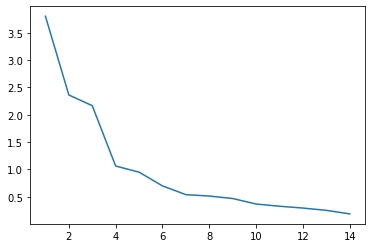

In [29]:
#Subset of the data
x =df[df.columns[6:20]] 

fa = FactorAnalyzer()
fa.fit(x, 10)

#Get Eigen values and plot
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)

In [31]:
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(x)
loads = fa.loadings_
print(loads)

[[ 0.16826952  0.12827119  0.75809134]
 [-0.02950837  0.05968117  0.50138365]
 [ 0.03023106  0.02091436  0.93277525]
 [-0.0338282  -0.03231121  0.50404385]
 [ 0.75263893  0.01094635  0.00616734]
 [ 0.39545345  0.1138114   0.35906543]
 [ 0.78999048  0.08146326  0.02725824]
 [ 0.7456934   0.46674984  0.01203424]
 [ 0.09388069  0.70115382  0.02900913]
 [ 0.07445487  0.48144209  0.08065029]
 [ 0.02346305  0.76474833  0.02769279]
 [ 0.14351222  0.28418169  0.02888186]
 [ 0.01813146  0.79977083  0.01825226]
 [ 0.85842046  0.08814824 -0.00170807]]


In [33]:
import pingouin as pg

In [34]:
#Create factors
factor1 = df[['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']]
factor2 = df[['On-board service', 'Baggage handling', 'Inflight service']]
factor3 = df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']]

#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)

print(factor1_alpha, factor2_alpha, factor3_alpha)

(0.8762877916624101, array([0.875, 0.878])) (0.794291693309021, array([0.792, 0.796])) (0.7679754211110685, array([0.766, 0.77 ]))
